In [1]:
import pandas as pd



In [4]:
ASNNames = ['Frequency', 'AngleAttack', 'ChordLength', 'FSVelox', 'SSDT', 'SSP']

ASNdata = pd.read_csv('airfoil_self_noise.dat', delim_whitespace= True, names = ASNNames)

print(ASNdata.head(20))


    Frequency  AngleAttack  ChordLength  FSVelox      SSDT      SSP
0         800          0.0       0.3048     71.3  0.002663  126.201
1        1000          0.0       0.3048     71.3  0.002663  125.201
2        1250          0.0       0.3048     71.3  0.002663  125.951
3        1600          0.0       0.3048     71.3  0.002663  127.591
4        2000          0.0       0.3048     71.3  0.002663  127.461
5        2500          0.0       0.3048     71.3  0.002663  125.571
6        3150          0.0       0.3048     71.3  0.002663  125.201
7        4000          0.0       0.3048     71.3  0.002663  123.061
8        5000          0.0       0.3048     71.3  0.002663  121.301
9        6300          0.0       0.3048     71.3  0.002663  119.541
10       8000          0.0       0.3048     71.3  0.002663  117.151
11      10000          0.0       0.3048     71.3  0.002663  115.391
12      12500          0.0       0.3048     71.3  0.002663  112.241
13      16000          0.0       0.3048     71.3

C:\Users\goeld\AppData\Local\Temp\ipykernel_25220\1327538187.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ASNdata = pd.read_csv('airfoil_self_noise.dat', delim_whitespace= True, names = ASNNames)


In [8]:
print(ASNdata.info())

Basicstats = ASNdata.describe()

Basicstats = Basicstats.transpose()

print(Basicstats)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Frequency    1503 non-null   int64  
 1   AngleAttack  1503 non-null   float64
 2   ChordLength  1503 non-null   float64
 3   FSVelox      1503 non-null   float64
 4   SSDT         1503 non-null   float64
 5   SSP          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None
              count         mean          std         min         25%  \
Frequency    1503.0  2886.380572  3152.573137  200.000000  800.000000   
AngleAttack  1503.0     6.782302     5.918128    0.000000    2.000000   
ChordLength  1503.0     0.136548     0.093541    0.025400    0.050800   
FSVelox      1503.0    50.860745    15.572784   31.700000   39.600000   
SSDT         1503.0     0.011140     0.013150    0.000401    0.002535   
SSP          1503.0   124.835943     6.898657  103.380000  120.1

In [9]:
from sklearn.preprocessing import MinMaxScaler

ScalerObject = MinMaxScaler()

print(ScalerObject.fit(ASNdata))

MinMaxScaler(copy = True, feature_range = (0, 1))

ASNdatascaled = ScalerObject.fit_transform(ASNdata)



MinMaxScaler()


In [11]:
ASNdatascaled = pd.DataFrame(ASNdatascaled, columns = ASNNames)

summary = ASNdatascaled.describe()

summary = summary.transpose()

print(summary)



              count      mean       std  min       25%       50%       75%  \
Frequency    1503.0  0.135676  0.159221  0.0  0.030303  0.070707  0.191919   
AngleAttack  1503.0  0.305509  0.266582  0.0  0.090090  0.243243  0.445946   
ChordLength  1503.0  0.397810  0.334791  0.0  0.090909  0.272727  0.727273   
FSVelox      1503.0  0.483857  0.393252  0.0  0.199495  0.199495  1.000000   
SSDT         1503.0  0.185125  0.226687  0.0  0.036794  0.078550  0.261594   
SSP          1503.0  0.570531  0.183441  0.0  0.447018  0.594065  0.707727   

             max  
Frequency    1.0  
AngleAttack  1.0  
ChordLength  1.0  
FSVelox      1.0  
SSDT         1.0  
SSP          1.0  


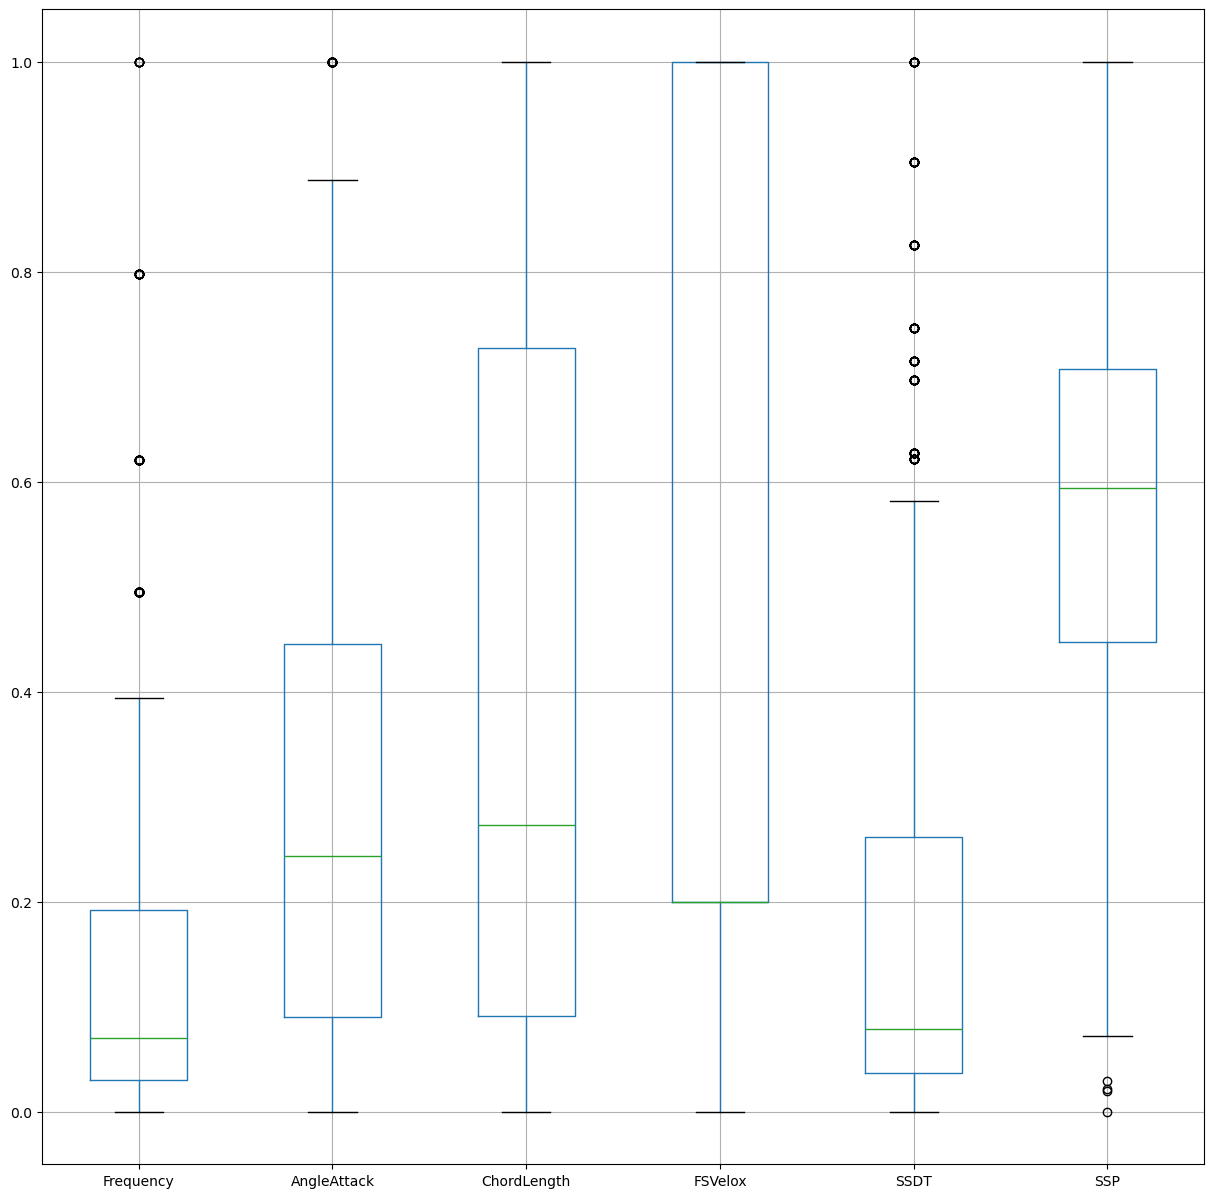

In [15]:
import matplotlib.pyplot as plt

boxplot = ASNdatascaled.boxplot(column = ASNNames, figsize= (15, 15))

plt.show()



In [17]:
## Pearson Correlation data of the scaled dataset

CorASNdata = ASNdatascaled.corr(method= 'pearson')

with pd.option_context('display.max_rows', None, 'display.max_columns', CorASNdata.shape[1]):
    print(CorASNdata)


SpaermanCorASNdata = ASNdatascaled.corr(method = 'spearman')

with pd.option_context('display.max_rows', None, 'display.max_columns', SpaermanCorASNdata.shape[1]):
    print(SpaermanCorASNdata)

KendallCorASNdata = ASNdatascaled.corr(method = 'kendall')

with pd.option_context('display.max_rows', None, 'display.max_columns', KendallCorASNdata.shape[1]):
    print(KendallCorASNdata)

    

             Frequency  AngleAttack  ChordLength   FSVelox      SSDT       SSP
Frequency     1.000000    -0.272765    -0.003661  0.133664 -0.230107 -0.390711
AngleAttack  -0.272765     1.000000    -0.504868  0.058760  0.753394 -0.156108
ChordLength  -0.003661    -0.504868     1.000000  0.003787 -0.220842 -0.236162
FSVelox       0.133664     0.058760     0.003787  1.000000 -0.003974  0.125103
SSDT         -0.230107     0.753394    -0.220842 -0.003974  1.000000 -0.312670
SSP          -0.390711    -0.156108    -0.236162  0.125103 -0.312670  1.000000
             Frequency  AngleAttack  ChordLength   FSVelox      SSDT       SSP
Frequency     1.000000    -0.293374    -0.012252  0.102771 -0.350656 -0.340783
AngleAttack  -0.293374     1.000000    -0.466105  0.065306  0.881340 -0.140768
ChordLength  -0.012252    -0.466105     1.000000  0.007047 -0.074884 -0.243029
FSVelox       0.102771     0.065306     0.007047  1.000000 -0.005654  0.116218
SSDT         -0.350656     0.881340    -0.074884 -0.

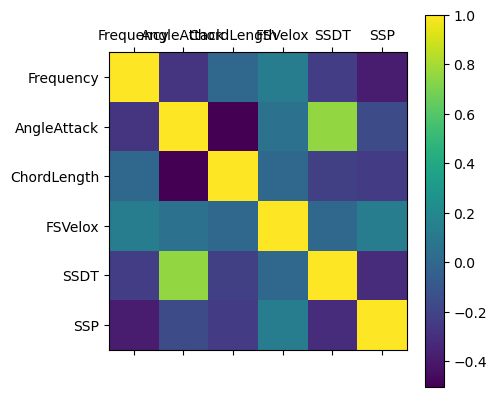

In [25]:
plt.matshow(CorASNdata)

plt.xticks(range(len(CorASNdata.columns)), CorASNdata.columns)

plt.yticks(range(len(CorASNdata.columns)), CorASNdata.columns)

plt.colorbar()

plt.show()



In [26]:
from sklearn.model_selection import train_test_split

X = ASNdatascaled.drop('SSP', axis = 1)

print('X shape = ', X.shape)

Y = ASNdatascaled['SSP']

print('Y shape = ', Y.shape)



X shape =  (1503, 5)
Y shape =  (1503,)


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.30, random_state= 5)

print('X train shape =', X_train.shape)

print('X test shape =', X_test.shape)

print('Y train shape =', Y_train.shape)

print('Y test shape =', Y_test.shape)

X train shape = (1052, 5)
X test shape = (451, 5)
Y train shape = (1052,)
Y test shape = (451,)


In [29]:
## Training a Multiple Linear Regression Model on the Spliited Dataset

from sklearn.linear_model import LinearRegression

Lmodel = LinearRegression()

Lmodel.fit(X_train, Y_train)

Y_predLM = Lmodel.predict(X_test)



In [30]:
from sklearn.metrics import mean_squared_error

MseLM = mean_squared_error(Y_test, Y_predLM)

print('Mean Square Error of the formulated Linear Regression Model:', MseLM)



Mean Square Error of the formulated Linear Regression Model: 0.015826467113949756


In [33]:
## Formulation of a Multilayer Perceptron Model

from sklearn.neural_network import MLPRegressor

MLPRegmodel = MLPRegressor(hidden_layer_sizes = (50), activation = 'relu', solver = 'lbfgs', tol = 1e-4, max_iter = 10000, random_state = 0)



In [34]:
MLPRegmodel.fit(X_train, Y_train)

Y_predMLPReg = MLPRegmodel.predict(X_test) 

MseMLP = mean_squared_error(Y_test, Y_predMLPReg)

print(' MSE of the formulated Multilayer Perceptron Model:', MseMLP)



 MSE of the formulated Multilayer Perceptron Model: 0.0036459765532482072


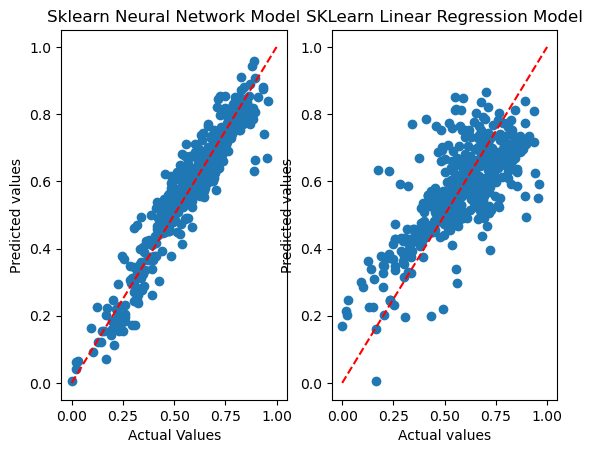

In [35]:
#Sklearn Neural Network Diagram
plt.figure(1)

plt.subplot(121)

plt.scatter(Y_test, Y_predMLPReg)

plt.plot((0,1), "r--")

plt.xlabel("Actual Values")

plt.ylabel("Predicted values")

plt.title("Sklearn Neural Network Model")

# SKLearn Linear Regression diagram

plt.subplot(122)

plt.scatter(Y_test, Y_predLM)

plt.plot((0, 1), "r--")

plt.xlabel("Actual values")

plt.ylabel("Predicted values")

plt.title("SKLearn Linear Regression Model")

plt.show()